In [ ]:
##REDES NEURONALES

# Tensorflow: paquete de paralización en Phyton para manejar objetos n-dimensionales. Para APRENDIZAJE SUPERVISADO
# Keras: API de red neuronal
# Input layer: la primera capa de información a procesar
# Hidden layer: capas que activan e interactuan con el input e infieren patrones
# Output layer: resultado final de la red neuronal

# Cada neurona está conectada con otras a través de unos enlaces. 
# En estos enlaces el valor de salida de la neurona anterior es multiplicado por un valor de peso. 
# Estos pesos en los enlaces pueden incrementar o inhibir el estado de activación de las neuronas adyacentes. 
# Del mismo modo, a la salida de la neurona, puede existir una función limitadora o umbral, que modifica el valor resultado o impone un límite que se debe sobrepasar antes de propagarse a otra neurona. 
# Esta función se conoce como función de activación.

In [2]:
import tensorflow as tf
from tensorflow import keras

mamifero = tf.Variable("Elephant", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265, tf.float64)
my_image = tf.zeros([10,299,299,3])
my_image

#Resultado: <tf.Tensor 'zeros:0' shape=(10, 299, 299, 3) dtype=float32>
#hacemos un objeto de tipo tensorflow lleno de zeros de 4 dimensiones: 
#3 cubos de: 10 rows, 300 columnas, 300 Z

<tf.Tensor 'zeros:0' shape=(10, 299, 299, 3) dtype=float32>

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#dataset de ejemplo
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
# train_images.shape #(60000, 28, 28) 60000 imagenes de 28x28
# train_labels #devuleve valores de 0 a 9 asi que es una clasificación

#los datos vienen en rango de 0 a 255 asi que los normalizamos de 0 a 1. Si no los normalizaramos el aprendizaje sería muy malo o haría falta muchas mas epocas
train_images = train_images / 255.0
test_images = test_images / 255.0

#vamos a ver el primero de los elementos de los 60000
# plt.figure()
# plt.imshow(train_images[0])
# plt.show()

#nuestra red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer de 128 nodos, tf.nn.relu = rectifing linear unit activation
    keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 outputs
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #adam es un algoritmo de optimización

model.fit(train_images, train_labels, epochs=5) #5 periodos de entrenamiento, veremos que en cada epoca vamos mejorando la precisión

#ahora que ha entrenado le pasamos una imagen de test para evaluar el modelo
predictions = model.predict(test_images)
np.argmax(predictions[0])

Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5000 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3758 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3373 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3151 - acc: 0.8831
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2962 - acc: 0.8912


9

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


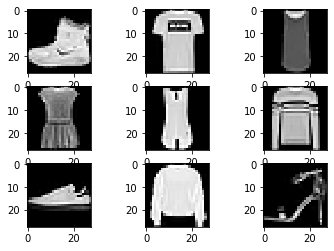

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 102us/sample - loss: 2.3053 - acc: 0.1563 - val_loss: 2.0316 - val_acc: 0.3141
Epoch 2/3
60000/60000 [==============================] - 7s 114us/sample - loss: 2.0280 - acc: 0.2766 - val_loss: 1.8215 - val_acc: 0.4621
Epoch 3/3
60000/60000 [==============================] - 7s 113us/sample - loss: 1.8443 - acc: 0.3694 - val_loss: 1.6658 - val_acc: 0.5473


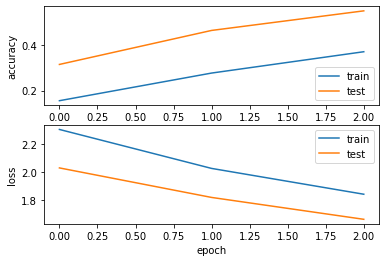

In [34]:
##Problema
# 1- Cargar el dataset de prueba MNIST desde keras.datasets
# 2- explorar el dataset con .shape, print() y otros métodos
# 3- Normalizar el dataset a 255
# 4- crear en keras un modelo sequential() con: 
#     4.1- Una capa Flatten que acepte image data como single vector
#     4.2- Una capa Dense() con 128 unidades y funcion de activacion relu
#     4.3- Capa de salida Dense() con 10 unidades y funcion de activacion softmax
# 5- Compilar y salvar el fitted model como objeto con los siguientes parametros:
#     optimizer: keras.optimezers.Adadelta()
#     loss function: 'sparse_categorical_crossentropy'
#     metrics: accuracy
#     validation_dat: test images from MNIST dataset
# 6- Tras entrenar el modelo, examinalo con .history
# 7- Plot accuracy, validation accuracy, loss y validation loss desde el objeto .history


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1- Cargar el dataset de prueba MNIST desde keras.datasets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()


# 2- explorar el dataset con .shape, print() y otros métodos
train_images.shape #60000 imagenes de 28x28

print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first 9 images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()


# 3- Normalizar el dataset a 255
train_images = train_images / 255.0
test_images = test_images / 255.0


# 4- crear en keras un modelo sequential() con: 
#     4.1- Una capa Flatten que acepte image data como single vector
#     4.2- Una capa Dense() con 128 unidades y funcion de activacion relu
#     4.3- Capa de salida Dense() con 10 unidades y funcion de activacion softmax
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer de 128 nodos, tf.nn.relu = rectifing linear unit activation
    keras.layers.Dropout(0.5), #esta capa descarta el 50% de los componentes lo que mejorara el accuracy
    keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 outputs
])


# 5- Compilar y salvar el fitted model como objeto con los siguientes parametros:
#     optimizer: keras.optimizers.Adadelta()
#     loss function: 'sparse_categorical_crossentropy'
#     metrics: accuracy
#     validation_dat: test images from MNIST dataset
model.compile(optimizer=keras.optimizers.Adadelta(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_log = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))


# 6- Tras entrenar el modelo, examinalo con .history
model_log.history


# 7- Plot accuracy, validation accuracy, loss y validation loss desde el objeto .history
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


##INTERPRETAR RESULTADO
# segun las 3 epocas avanzan el accuracy mejora y la perdida decae

In [35]:
##CNN Convolutional Neural Network
# 1- Construir una red neural estandard
# 2- Salvar el resultado del modelo con .evaulate()
# 3- Usar add() para poder añadir a posteriori capas
# 4- Input layer convolucional Conv2D de 32 unidades de 3x3 pixeles, funcion relu de activacion e input image shape dimension(x,y,z)
# 5- Una segunda capa de activación Conv2D con 64 unidades y un kernel size apropiado
# 6- Una capa MaxPooling2D con un pool size de 2x2

import tensorflow as tf
from tensorflow import keras as ks

(train_images, train_labels), (test_images, test_labels) = ks.datasets.fashion_mnist.load_data() #cargamos el dataset

#hacemos reshape de los datos, para que el modelo sepa que dimension se usa para cambiar de imagen
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

#normalización
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#convertimos las 'labels' en valores entre 0 y 1
y_train = ks.utils.to_categorical(train_labels, 10)
y_test = ks.utils.to_categorical(test_labels, 10)


input_shape = (28,28,1)

model = ks.Sequential()
model.add(ks.layers.Conv2D(32, kernel_size=(3, 3), #Input layer convolucional Conv2D de 32 unidades de 3x3 pixeles, funcion relu de activacion e input image shape dimension(x,y,z)
                 activation='relu',
                 input_shape=input_shape))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu')) #Una segunda capa de activación Conv2D con 64 unidades y un kernel size apropiado
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2))) #Una capa MaxPooling2D con un pool size de 2x2
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dropout(0.5))                     
model.add(ks.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) #Salvamos el resultado del modelo con .evaluate()
score

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)             

[0.2632025419592857, 0.9035]

In [37]:
##PROYECTO
# 1- Process MNIST dataset
# 2- Normalize image data, convert labels to integers
# 3- Take note of image dimensions using (image.shape, image.channels)
# 4- Add a convolutional layer to your sequential() model prior to your input, hidden, and output layers
# 5- Conv2D layer with: 32 units, 3x3 kernal size, relu activation function
# 6- Second Conv2D activation layer with: 64 units and relu activation function
# 7- A MaxPooling2D layer with 2x2 pooling size
# 8- Add standard input, hidden, output layers
# 9- Save output of model into a variable using .evaluate()

import tensorflow as tf
from tensorflow import keras as ks

# 1- Process MNIST dataset
(train_images, train_labels), (test_images, test_labels) = ks.datasets.fashion_mnist.load_data()

# 2- Normalize image data, convert labels to integers
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = ks.utils.to_categorical(train_labels, 10)
y_test = ks.utils.to_categorical(test_labels, 10)

# 3- Take note of image dimensions using (image.shape, image.channels)
input_shape = (28,28,1)

# 4- Add a convolutional layer to your sequential() model prior to your input, hidden, and output layers
model = ks.Sequential()
# 5- Conv2D layer with: 32 units, 3x3 kernal size, relu activation function
model.add(ks.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# 6- Second Conv2D activation layer with: 64 units and relu activation function
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
# 7- A MaxPooling2D layer with 2x2 pooling size
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.25))
# 8- Add standard input, hidden, output layers
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dropout(0.5))                     
model.add(ks.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

# 9- Save output of model into a variable using .evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
score

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

[0.2701947840690613, 0.9008]